In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# !unzip '/gdrive/My Drive/datasets/train_data_icdar2019.zip' -d '/gdrive/My Drive/datasets/'

In [ ]:
import pickle
import json
import numpy as np
import random
from skimage import io, transform
from skimage.util import img_as_uint #crop
from skimage.color import rgb2gray, gray2rgb
from skimage.transform import resize
import matplotlib.pyplot as plt

pkl_file = open('/gdrive/My Drive/datasets/filenames.pkl', 'rb')
filenames = pickle.load(pkl_file)
pkl_file.close()
print(filenames['train_data'][0])

['datasets/train_data_icdar2019/strings/Century_bold_italic_serif.ttf/images/strip_07_000_0_0.png', 'datasets/train_data_icdar2019/strings/Century_bold_italic_serif.ttf/markup/strip_07_000_0_0.png.json']


(234, 1000)


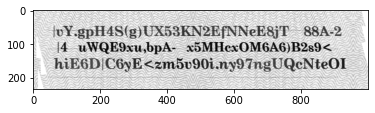

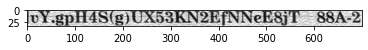

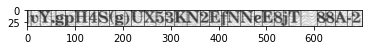

	 "/vY.gpH4S(g)UX53KN2EfNNeE8jT 88A-2"


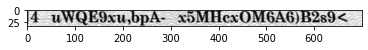

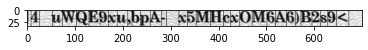

	 "/4 uWQE9xu,bpA- x5MHcxOM6A6)B2s9< "


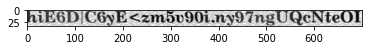

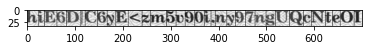

	 "hiE6D/C6yE<zm5v90i.ny97ngUQcNteOI"


In [ ]:
image = img_as_uint(io.imread('/gdrive/My Drive/'+filenames['train_data'][0][0], as_gray=True))
print(image.shape)
plt.figure()
plt.imshow(image, cmap='gray')
plt.show()
with open('/gdrive/My Drive/'+filenames['train_data'][0][1], 'r') as fp:
    label = json.load(fp)
for item in label:
    x, y, w, h = item['line_rect']
    sample = {}
    img_crop = image[y:y+h, x:x+w] #crop(image, ((y, y+h), (x, x+w)))
    img_crop = resize(img_crop, (33, 700))
    plt.figure()
    plt.imshow(img_crop, cmap='gray')
    plt.show()
    # print(img_crop.shape, np.max(item['cuts_x']), np.min(item['cuts_x']), x)
    
    index = (np.asarray(item['cuts_x']) - x) *699/w
    index = index.astype(int)
    # img_crop_rgb = gray2rgb(img_crop)
    for i in index:
      img_crop[:, i] = 0
      # img_crop_rgb[:, i, 0] = 255
      # img_crop_rgb[:, i, 1] = 0
      # img_crop_rgb[:, i, 2] = 0
    plt.figure()
    plt.imshow(img_crop, cmap='gray')
    plt.show()
    output = '"'
    for ch in [chr(k) for k in item['values']]:
      output += ch
    output += '"'
    print("\t",output)

In [ ]:
img_crop

array([[60107, 60236, 59208, ..., 58402, 59431, 60275],
       [59409, 58436, 56379, ..., 49439, 50890, 53553],
       [45316, 39827, 34724, ..., 51329, 49842, 48467],
       ...,
       [56456, 59706, 62536, ..., 59298, 58270, 57315],
       [48705, 51955, 56841, ..., 60640, 58455, 55756],
       [48758, 46243, 48392, ..., 58565, 55573, 51920]], dtype=uint16)

32
33


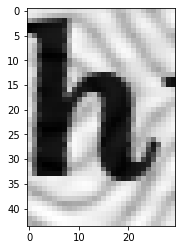

In [ ]:
print(len(item['cuts_x']))
print(len(item['values']))
img_char = img_crop[:, 0:index[0]]
plt.figure()
plt.imshow(img_char, cmap='gray')
plt.show()

In [ ]:


images_char = {}
fd = []
fd_min, fd_max, fd_mean, w_h_min, w_h_max = [], [], [], [], []

for _f in filenames['train_data']:
  image = img_as_uint(io.imread('/gdrive/My Drive/'+_f[0], as_gray=True))
  with open('/gdrive/My Drive/'+_f[1], 'r') as fp:
      label = json.load(fp)
  fd_temp = []
  w_h_temp = []
  for item in label:
      
      if len(item['start_x']) != len(item['end_x']):
          print(_f[0].split("/")[-1], item['start_x']), len(item['end_x'])
          continue
      values = [chr(k) for k in item['values']]
      i = 0 
      for val_index in range(len(values)):
          
          sample = {}
          # y_vector = np.zeros(44)
          if (values[val_index] != ' ' and len(values)!=len(item['start_x'])) or len(values)==len(item['start_x']):
              img_crop = image[item['let_blines'][i][0]:item['let_blines'][i][1], item['start_x'][i]:item['end_x'][i]]
              # if item['end_x'][i] - item['start_x'][i] not in fd:
              fd.append(item['end_x'][i] - item['start_x'][i])
              fd_temp.append(item['end_x'][i] - item['start_x'][i])
              w_h_temp.append((item['end_x'][i] - item['start_x'][i])/(item['let_blines'][i][1] - item['let_blines'][i][0]))
              i += 1
          else:
              _, y, _, h = item['line_rect']
              y1 = y #item['let_blines'][i-1][0]
              y2 = y+h #item['let_blines'][i-1][1]
              try:
                  if i==0:
                      x1 = item['start_x'][i] - 19
                      x2 = item['start_x'][i]
                  elif i<len(item['start_x']):
                      mid = int((item['end_x'][i-1] + item['start_x'][i])/2)
                      x1 = mid - 9
                      x2 = mid + 10
                  else:
                      x1 = item['end_x'][i-1]
                      x2 = x1+19
                  if x1 >= x2 or y1 == y2:
                      print(i, y1, y2, x1, x2)
                      print(item['start_x'])
                      print(item['end_x'])
                      print(values)
                      sys.exit(1)
                  img_crop = image[y1:y2, x1:x2]
              except IndexError:
                  print(len(values), len(item['let_blines']), len(item['end_x']), len(item['start_x']), i)
                  print(values)                            
                  sys.exit(1)
              
          # y_vector[label_map[values[val_index]]] = 1
          # try:
          if values[val_index] not in images_char:
            images_char[values[val_index]] = []
          images_char[values[val_index]].append(resize(img_crop, (15,19)))
          # except:
          #     print(y1, y2, x1, x2, image.shape)
  fd_min.append(np.min(fd_temp))
  fd_max.append(np.max(fd_temp))
  fd_mean.append(np.mean(fd_temp))
  w_h_min.append(np.min(w_h_temp))
  w_h_max.append(np.max(w_h_temp))
      

In [ ]:
# pkl_file = open('/gdrive/My Drive/datasets/images_char.pkl', 'rb')
# images_char_val = pickle.load(pkl_file)
# pkl_file.close()
images_char.keys()

dict_keys(['/', 'v', 'Y', '.', 'g', 'p', 'H', '4', 'S', '(', ')', 'U', 'X', '5', '3', 'K', 'N', '2', 'E', 'f', 'e', '8', 'j', 'T', ' ', 'A', '-', 'u', 'W', 'Q', '9', 'x', ',', 'b', 'M', 'c', 'O', '6', 'B', 's', '<', 'h', 'i', 'D', 'C', 'y', 'z', 'm', '0', 'n', '7', 't', 'I', 'G', 'o', 'L', 'V', 'w', 'l', 'r', 'R', '1', 'd', 'k', 'F', 'Z', 'P', 'q', 'a', 'J'])

In [ ]:
print(np.min(fd), np.max(fd), np.mean(fd))
print(np.mean(fd_min), np.mean(fd_max), np.mean(fd_mean))
print(np.mean(w_h_min), np.mean(w_h_max))

2 63 20.523034444461583
6.963997942739585 36.7073547059832 20.819275235509007
0.23017702750333277 1.4593450259211191


In [ ]:
output = open('/gdrive/My Drive/datasets/images_char.pkl', 'wb')
pickle.dump(images_char, output)
output.close()

In [ ]:
import pickle
import numpy as np
import random

#label map if not case sensitive
# label_map = {'(': 0, ')': 1, ',': 2, '.' :3, '-': 4, '/': 5, '<': 6, ' ':7}
# for i in range(10):
#     label_map[chr(48+i)] = 8+i
# for i in range(26):
#     label_map[chr(65+i)] = 18+i
#     label_map[chr(97+i)] = 18+i
# for i in label_map:
#   images_char[label_map[i]] = []

#label map if case sensitive
label_map = {'(': 0, ')': 1, ',': 2, '.' :3, '-': 4, '/': 5, '<': 6, ' ':7}
for i in range(10):
    label_map[chr(48+i)] = 8+i
for i in range(26):
    label_map[chr(65+i)] = 18+i
for i in range(26):
    label_map[chr(97+i)] = 44+i
# for i in label_map:
#   images_char[label_map[i]] = []

X_train, X_val, Y_train, Y_val = [], [], [], []
pkl_file = open('/gdrive/My Drive/datasets/images_char.pkl', 'rb')
images_char = pickle.load(pkl_file)
pkl_file.close()
pkl_file = open('/gdrive/My Drive/datasets/images_char_val.pkl', 'rb')
images_char_val = pickle.load(pkl_file)
pkl_file.close()
# Split into tran and val
# for i in images_char:
#   random_image_list = random.sample(images_char[i], min(5500, len(images_char[i])))
#   y_vector = np.zeros(44)
#   y_vector[i] = 1
#   for j in range(int(0.9*len(random_image_list))):
#     X_train.append(random_image_list[j])
#     Y_train.append(y_vector)
#   for j in range(int(0.9*len(random_image_list)),len(random_image_list)):
#     X_val.append(random_image_list[j])
#     Y_val.append(y_vector)

min_image_count = min([len(images_char[i]) for i in images_char])
for i in images_char:
  val = label_map[i]
  random_image_list = random.sample(images_char[i], min(min_image_count, len(images_char[i])))
  y_vector = np.zeros(70)
  y_vector[val] = 1
  for j in range(len(random_image_list)):
    X_train.append(random_image_list[j])
    Y_train.append(y_vector)
X_train  = np.asarray(X_train)
X_train = X_train.reshape(X_train.shape[0], 15, 19, 1)
Y_train = np.asarray(Y_train)

for i in images_char_val:
  random_image_list = random.sample(images_char[i], min(int(0.1*min_image_count), len(images_char[i])))
  y_vector = np.zeros(70)
  val = label_map[i]
  y_vector[val] = 1
  for j in range(len(random_image_list)):
    X_val.append(random_image_list[j])
    Y_val.append(y_vector)
X_val  = np.asarray(X_val)
X_val = X_val.reshape(X_val.shape[0], 15, 19, 1)
Y_val = np.asarray(Y_val)

(370370, 15, 19, 1) (370370, 70)
(37030, 15, 19, 1) (37030, 70)
5291


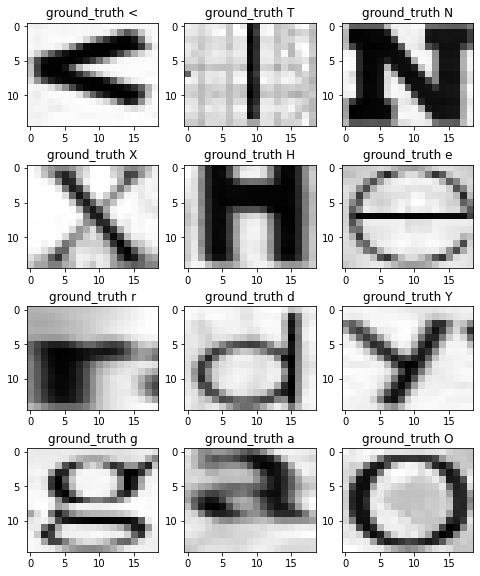

In [ ]:
import matplotlib.pyplot as plt

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(min_image_count)
random_index = random.sample(range(0,X_train.shape[0]), 12)
fig, axes = plt.subplots(4,3, figsize=(8,10))

for i, ax in enumerate(axes.flat):
  ax.imshow(X_train[random_index[i]].reshape(15,19), cmap='gray')
  val = np.argmax(Y_train[random_index[i]])
  for k, v in label_map.items():
    if v == val:
      ax.title.set_text("ground_truth " + str(k))
plt.show()
# for i in random_index:
#   plt.figure(figsize=(2,2))
#   plt.imshow(X_train[i].reshape(15,19), cmap='gray')
#   plt.show()
#   val = np.argmax(Y_train[i])
#   for k, v in label_map.items():
#     if v == val:
#       print(k)

In [ ]:
from keras.models import Model, Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, Dense, Activation, ZeroPadding2D, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import regularizers
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import regularizers

model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), padding = 'valid', strides = (1,1), input_shape=(15, 19, 1), kernel_regularizer =regularizers.l2(0.001) ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(8, kernel_size=(3, 3), padding = 'same', strides = (1,1), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(16, kernel_size=(3, 3), padding = 'same', strides = (2,2), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(16, kernel_size=(3, 3), padding = 'same', strides = (1,1), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(16, kernel_size=(3, 3), padding = 'same', strides = (1,1), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', strides = (2,2), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', strides = (1,1), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', strides = (1,1), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(8, kernel_size=(3, 3), padding = 'same', strides = (1,1), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(70, activation='softmax' ))

# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=tuple(X_train.shape[1:])))
# model.add(BatchNormalization())
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01))) #maybe suppress this layer and instead train for batch size = 64, epochs = 20
# model.add(BatchNormalization())
# # model.add(Conv2D(512, (3, 3), activation='relu'))
# # model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# # model.add(Dropout(0.5))
# model.add(Dense(44, activation='softmax'))

epochs = 50
batch_size = 64

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
# es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.5)
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=0, mode='max')
mcp_save = ModelCheckpoint('classifierpaper_70classes.h5', save_best_only=True, monitor='val_accuracy', mode='max')
# reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.001)
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs, callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
          verbose=2, validation_data=(X_val, Y_val))
score = model.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
5788/5788 - 266s - loss: 0.6656 - accuracy: 0.8347 - val_loss: 0.4754 - val_accuracy: 0.8798
Epoch 2/50
5788/5788 - 266s - loss: 0.4054 - accuracy: 0.8982 - val_loss: 0.3867 - val_accuracy: 0.9012
Epoch 3/50
5788/5788 - 271s - loss: 0.3678 - accuracy: 0.9065 - val_loss: 0.3811 - val_accuracy: 0.8986
Epoch 4/50
5788/5788 - 266s - loss: 0.3506 - accuracy: 0.9109 - val_loss: 0.3836 - val_accuracy: 0.9035
Epoch 5/50
5788/5788 - 262s - loss: 0.3381 - accuracy: 0.9134 - val_loss: 0.3795 - val_accuracy: 0.9038
Epoch 6/50
5788/5788 - 263s - loss: 0.3304 - accuracy: 0.9151 - val_loss: 0.3678 - val_accuracy: 0.9029
Epoch 7/50
5788/5788 - 266s - loss: 0.3243 - accuracy: 0.9155 - val_loss: 0.3333 - val_accuracy: 0.9142
Epoch 8/50
5788/5788 - 269s - loss: 0.3179 - accuracy: 0.9167 - val_loss: 0.3900 - val_accuracy: 0.8972
Epoch 9/50
5788/5788 - 268s - loss: 0.3143 - accuracy: 0.9178 - val_loss: 0.3220 - val_accuracy: 0.9135
Epoch 10/50
5788/5788 - 271s - loss: 0.3108 - accuracy: 0.9185 -

In [ ]:
top1 = 0.0
top5 = 0.0    
class_probs = model.predict(X_val)
for i, l in enumerate(Y_val):
  label = np.where(l == 1)
  class_prob = class_probs[i]
  top_values = (-class_prob).argsort()[:3]
  if top_values[0] in label:
    top1 += 1.0
  if np.isin(np.array(label), top_values):
    top5 += 1.0

print("top1 acc", top1/len(Y_val))
print("top3 acc", top5/len(Y_val))

top1 acc 0.9532811234134485
top3 acc 0.9940318660545504


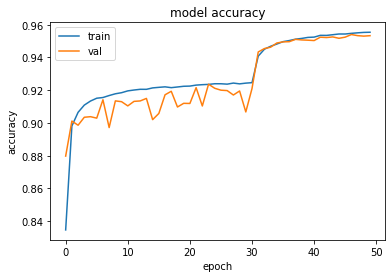

In [ ]:
# from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# plt.savefig('accuracy-5000-500_128batchsize.jpg')

In [ ]:
classifier_stat_plot = {}
classifier_stat_plot['train_acc'] = history.history['accuracy']
classifier_stat_plot['val_acc'] = history.history['val_accuracy']
classifier_stat_plot['train_loss'] = history.history['loss']
classifier_stat_plot['val_loss'] = history.history['val_loss']
classifier_stat_plot['test_loss'] = 0.1534486562013626
classifier_stat_plot['test_acc'] = 0.9532811045646667
classifier_stat_plot['top-3-acc'] = 0.9940318660545504

In [ ]:
with open('classifier_stat_plot.json', 'w') as fp:
  json.dump(classifier_stat_plot, fp)

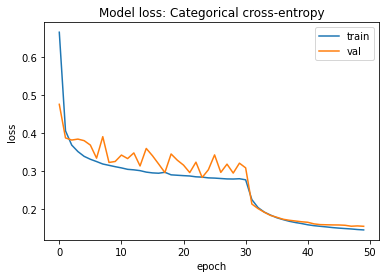

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss: Categorical cross-entropy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
# model.save('classifierpaper_synthetic95.h5')
model.count_params()

43862

In [ ]:
!cp -r '/content/classifierpaper_70classes-2.h5' '/gdrive/My Drive/datasets/'

In [ ]:
import os
import json
import numpy as np
import random
#from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from skimage import io, transform
from skimage.util import img_as_uint #crop
from skimage.color import rgb2gray
from skimage.transform import resize
import pickle
import sys

class ClassifierDataset(Dataset):

    def __init__(self, root_dir, dataset='train_data', transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        label_map = {'(': 0, ')': 1, ',': 2, '.' :3, '-': 4, '/': 5, '<': 6, ' ':7}
        for i in range(10):
            label_map[chr(48+i)] = 8+i
        for i in range(26):
            label_map[chr(65+i)] = 18+i
            label_map[chr(97+i)] = 18+i
        self.root_dir = root_dir 
        pkl_file = open(root_dir, 'rb')
        filenames = pickle.load(pkl_file)
        pkl_file.close()     
        self.transform = transform
        self.sample_list = []
        for _f in filenames[dataset]:
            image = img_as_uint(io.imread(_f[0], as_gray=True))
            with open(_f[1], 'r') as fp:
                label = json.load(fp)
            for item in label:
                if len(item['start_x']) != len(item['end_x']):
                    print(_f[0].split("/")[-1], item['start_x']), len(item['end_x'])
                    continue
                values = [chr(k) for k in item['values']]
                i = 0 
                for val_index in range(len(values)):
                    sample = {}
                    # y_vector = np.zeros(44)
                    if values[val_index] != ' ' and len(values)!=len(item['start_x']):
                        img_crop = image[item['let_blines'][i][0]:item['let_blines'][i][1], item['start_x'][i]:item['end_x'][i]]
                        i += 1
                    else:
                        _, y, _, h = item['line_rect']
                        y1 = y #item['let_blines'][i-1][0]
                        y2 = y+h #item['let_blines'][i-1][1]
                        try:
                            if i==0:
                                x1 = item['start_x'][i] - 19
                                x2 = item['start_x'][i]
                            elif i<len(item['start_x']):
                                mid = int((item['end_x'][i-1] + item['start_x'][i])/2)
                                x1 = mid - 9
                                x2 = mid + 10
                            else:
                                x1 = item['end_x'][i-1]
                                x2 = x1+19
                            if x1 >= x2 or y1 == y2:
                                print(i, y1, y2, x1, x2)
                                print(item['start_x'])
                                print(item['end_x'])
                                print(values)
                                sys.exit(1)
                            img_crop = image[y1:y2, x1:x2]
                        except IndexError:
                            print(len(values), len(item['let_blines']), len(item['end_x']), len(item['start_x']), i)
                            print(values)                            
                            sys.exit(1)
                        
                    # y_vector[label_map[values[val_index]]] = 1
                    try:
                        sample['image'] = resize(img_crop, (15,19)).reshape(1, 15, 19)
                        sample['label'] = label_map[values[val_index]]
                        self.sample_list.append(sample)
                    except:
                        print(y1, y2, x1, x2, image.shape)
                    

    def __len__(self):
        return len(self.sample_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        if self.transform:
            for item in range(len(self.sample_list)):
                self.sample_list[item] = self.transform(self.sample_list[item])
        return self.sample_list[idx]

class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, label = sample['image'], sample['label']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        # landmarks = landmarks * new_w / w #[new_w / w, new_h / h]

        return {'image': img, 'label': label}

class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['label']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        
        #image = image.transpose((2, 0, 1))
        if not torch.is_tensor(image):
            image = torch.from_numpy(image)
        if not torch.is_tensor(landmarks):
            landmarks = torch.tensor(landmarks)
        return {'image': image,
                'label': landmarks}

In [ ]:
train_dataset = ClassifierDataset('datasets/train_data_icdar2019/filenames.pkl', dataset='train_data',
                                           transform=transforms.Compose([ToTensor()]))
val_dataset = ClassifierDataset('datasets/train_data_icdar2019/filenames.pkl', dataset='val_data',
                                           transform=transforms.Compose([ToTensor()]))
test_dataset = ClassifierDataset('datasets/train_data_icdar2019/filenames.pkl', dataset='test_data',
                                           transform=transforms.Compose([ToTensor()]))

In [ ]:
parsed_list = {item['label']: [] for item in train_dataset}
for i in len(train_dataset):
    parsed_list[train_dataset[i]['label']].append(i)

for item in parsed_list:
  print(item, len(parsed_list[item]))

In [ ]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

NUM_TRAIN = 1000
NUM_VAL = 1000
NUM_TEST = 1000
batch_size_train = 64
loader_train = DataLoader(train_dataset, batch_size=batch_size_train, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

loader_val = torch.utils.data.DataLoader(val_dataset, batch_size = batch_size_train,
                                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))

loader_test = DataLoader(test_dataset, batch_size = NUM_TEST,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TEST)))

using device: cuda


In [ ]:
for i_batch, sample_batched in enumerate(loader_test):
    print(i_batch, sample_batched['image'].size(),sample_batched['label'].size())

0 torch.Size([1000, 1, 15, 19]) torch.Size([1000])


In [ ]:
def check_accuracy_part34(loader, model):
#     if loader.dataset.train:
#         print('Checking accuracy on validation set')
#     else:
#         print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t, x_y in enumerate(loader):
            x = x_y['image']
            y = x_y['label']
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        
def train_part34(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, x_y in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x_y['image'].to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = x_y['label'].to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)
            #loss = F.nll_loss(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                check_accuracy_part34(loader_val, model)
                print()
                
def flatten(x):
    N = x.shape[0] # read in N, C, H, W
    return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

In [ ]:
n_epochs = 3
learning_rate = 0.01
momentum = 0.5
log_interval = 10

class Flatten(nn.Module):
    def forward(self, x):
        return flatten(x)

model = nn.Sequential(
    nn.Conv2d(1, 8, kernel_size=3, padding=0, stride=1, bias = True), #26x26
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.Conv2d(8, 8, kernel_size=3, padding=1, stride=1, bias = True), #26x26
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.Conv2d(8, 16, kernel_size=3, padding=1, stride=2, bias = True), #13x13
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, padding=1, stride=1, bias = True), #13x13
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, padding=1, stride=1, bias = True), #13x13
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.Conv2d(16, 32, kernel_size=3, padding=1, stride=2, bias = True), #7x7
    nn.BatchNorm2d(32),
    nn.Tanh(),
    nn.Conv2d(32, 32, kernel_size=3, padding=1, stride=1, bias = True), #7x7
    nn.BatchNorm2d(32),
    nn.Tanh(),
    nn.Conv2d(32, 32, kernel_size=3, padding=1, stride=1, bias = True), #7x7
    nn.BatchNorm2d(32),
    nn.Tanh(),
    nn.Conv2d(32, 8, kernel_size=3, padding=1, stride=1, bias = True), #7x7
    nn.BatchNorm2d(8),
    nn.Tanh(),
    Flatten(),
    nn.Linear(8*4*5, 44, bias = True),
    nn.Softmax(dim=1),
)

optimizer = optim.SGD(model.parameters(), lr=learning_rate,
                     momentum=0.9, nesterov=True)

train_part34(model, optimizer, epochs=5)

Iteration 0, loss = 3.7844
Got 28 / 1000 correct (2.80)



KeyboardInterrupt: ignored